Importing

In [3]:
# Import libraries
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import datasets
data = pd.read_csv("/content/Video_Games.csv.zip")
data.describe()

,index,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16928.000000,16655.00000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,8260.000000,8260.000000,7718.000000
mean,8463.500000,2006.48532,0.266390,0.146850,0.078170,0.047861,0.539520,69.037893,26.428692,163.269629
std,4886.837014,5.88289,0.814326,0.504585,0.308756,0.186675,1.550545,13.943198,18.989929,562.786746
min,0.000000,1980.00000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,4231.750000,2003.00000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,8463.500000,2007.00000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,25.000000
75%,12695.250000,2010.00000,0.240000,0.110000,0.040000,0.040000,0.490000,79.000000,36.000000,82.000000
max,16927.000000,2020.00000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16655 non-null  float64
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       7718 non-null   float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(9

What game had the most sales?

According to the following bar graph, Wii Sports has the most game sales globally.

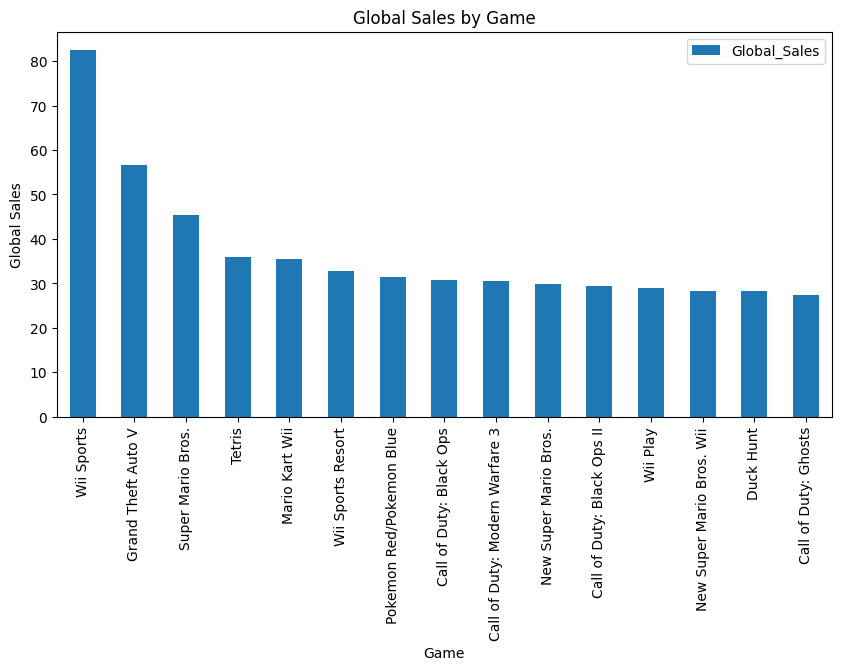

In [6]:
total_game_sales = data[['Name', 'Global_Sales']] \
                           .groupby('Name') \
                           .sum() \
                           .sort_values('Global_Sales', ascending=False) \
                           .head(15)

total_game_sales.plot(kind='bar',figsize=(10,5))
plt.xlabel('Game')
plt.ylabel('Global Sales')
plt.title('Global Sales by Game');

Which platform has the highest sales?

According to the following pie graph, The PS2 had the most sales.

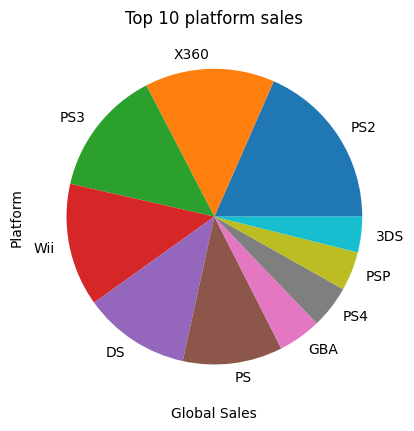

In [7]:
platform_to_most_sold = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
platform_to_most_sold.plot(kind='pie', title = 'Top 10 platform sales')
plt.xlabel('Global Sales')
plt.ylabel('Platform')
plt.show()

Which genres have sold the most between regions?

The following pie graphs show Americans, Europeans, and Other regions bought more Action games while Japanese audiences favored Role_Playing games.

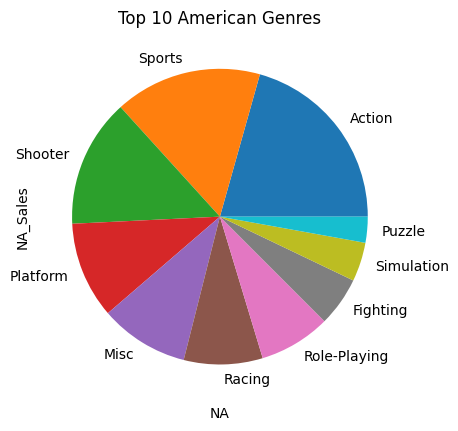

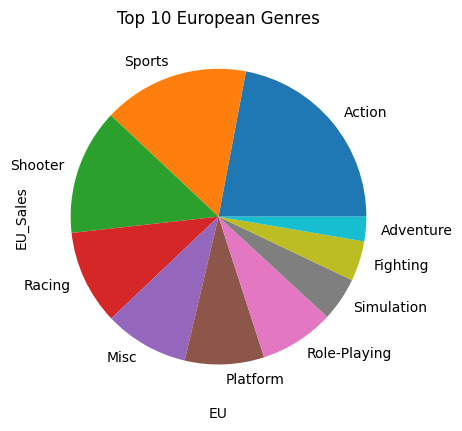

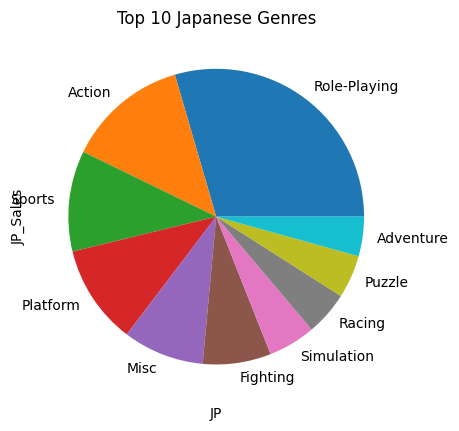

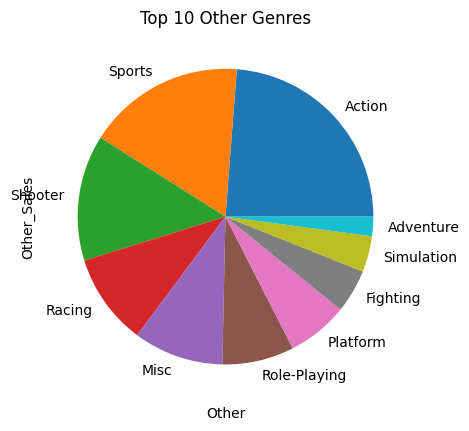

In [8]:
NA_genres = data.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False).head(10)
NA_genres.plot(kind='pie', title = 'Top 10 American Genres')
plt.xlabel('NA')
plt.show()

EU_genres = data.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False).head(10)
EU_genres.plot(kind='pie', title = 'Top 10 European Genres')
plt.xlabel('EU')
plt.show()

JP_genres = data.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False).head(10)
JP_genres.plot(kind='pie', title = 'Top 10 Japanese Genres')
plt.xlabel('JP')
plt.show()

Global_genres = data.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False).head(10)
Global_genres.plot(kind='pie', title = 'Top 10 Other Genres')
plt.xlabel('Other')
plt.show()

Which Publisher has the highest User Rating?

According to the following bar graph EA Canada has the highest User Score

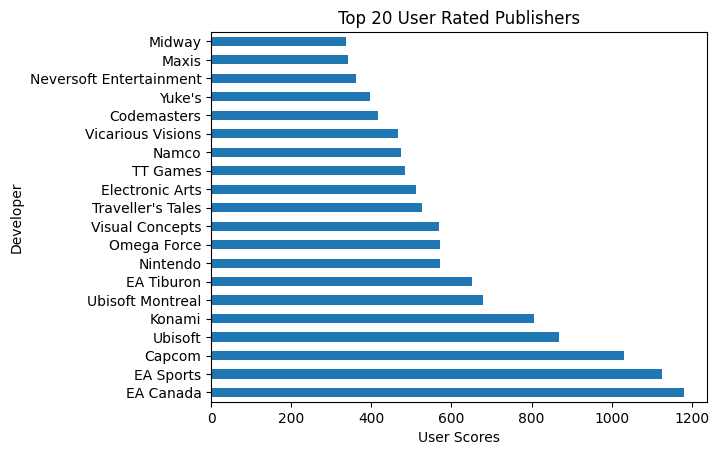

In [9]:
data['User_Score'] = pd.to_numeric(data['User_Score'], errors='coerce')
# Used Colabs Gemini to convert string/missing inputs to NaN in User_Score

publisher_score = data.groupby('Developer')['User_Score'].sum().sort_values(ascending=False).head(20)
publisher_score.plot(kind='barh', title = 'Top 20 User Rated Publishers')
plt.xlabel('User Scores')
plt.ylabel('Developer')
plt.show()

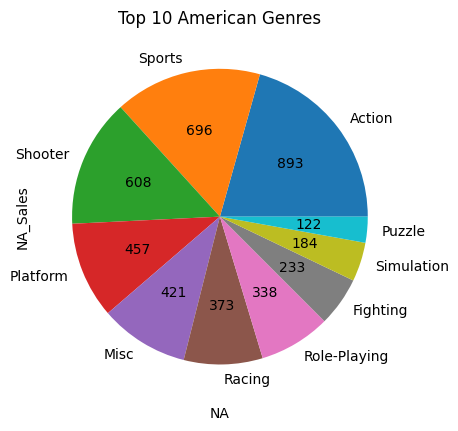

In [10]:
NA_genres = data.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False).head(10)

NA_genres.plot(kind='pie', title='Top 10 American Genres', labels=NA_genres.index, autopct=lambda p: '{v:d}'.format(v=int(p * sum(NA_genres) / 100)))
plt.xlabel('NA')
plt.show()